In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

In [15]:
data=pd.read_csv('Microsoft_stock.csv')
data.sample(5)

,Date,Open,High,Low,Close,Volume
730,2/23/2018 16:00:00,92.75,94.07,92.36,94.06,26329226
195,1/8/2016 16:00:00,52.37,53.28,52.15,52.33,48753969
952,1/11/2019 16:00:00,103.19,103.44,101.64,102.80,28314202
83,7/30/2015 16:00:00,46.26,47.40,45.93,46.88,39777883
764,4/13/2018 16:00:00,94.05,94.18,92.44,93.08,23346063


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [17]:
data["Date"]=pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [18]:
data.set_index("Date",inplace=True)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1511.0,1.073860e+02,5.669133e+01,40.34,5.786000e+01,93.99,1.394400e+02,2.450300e+02
High,1511.0,1.084375e+02,5.738228e+01,40.74,5.806000e+01,95.10,1.403250e+02,2.461300e+02
Low,1511.0,1.062945e+02,5.597716e+01,39.72,5.742000e+01,92.92,1.378250e+02,2.429200e+02
Close,1511.0,1.074221e+02,5.670230e+01,40.29,5.785500e+01,93.86,1.389650e+02,2.449900e+02
Volume,1511.0,3.019863e+07,1.425266e+07,101612.00,2.136213e+07,26629615.00,3.431962e+07,1.352271e+08


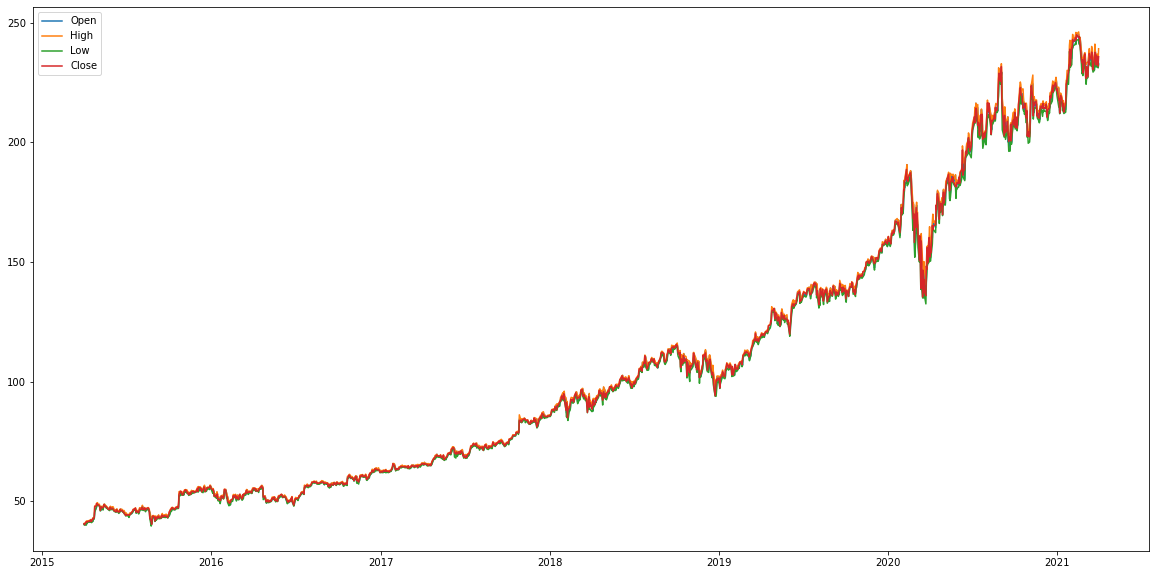

In [40]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data[data.columns[0]],label=data.columns[0])
plt.plot(data.index,data[data.columns[1]],label=data.columns[1])
plt.plot(data.index,data[data.columns[2]],label=data.columns[2])
plt.plot(data.index,data[data.columns[3]],label=data.columns[3])
plt.legend()

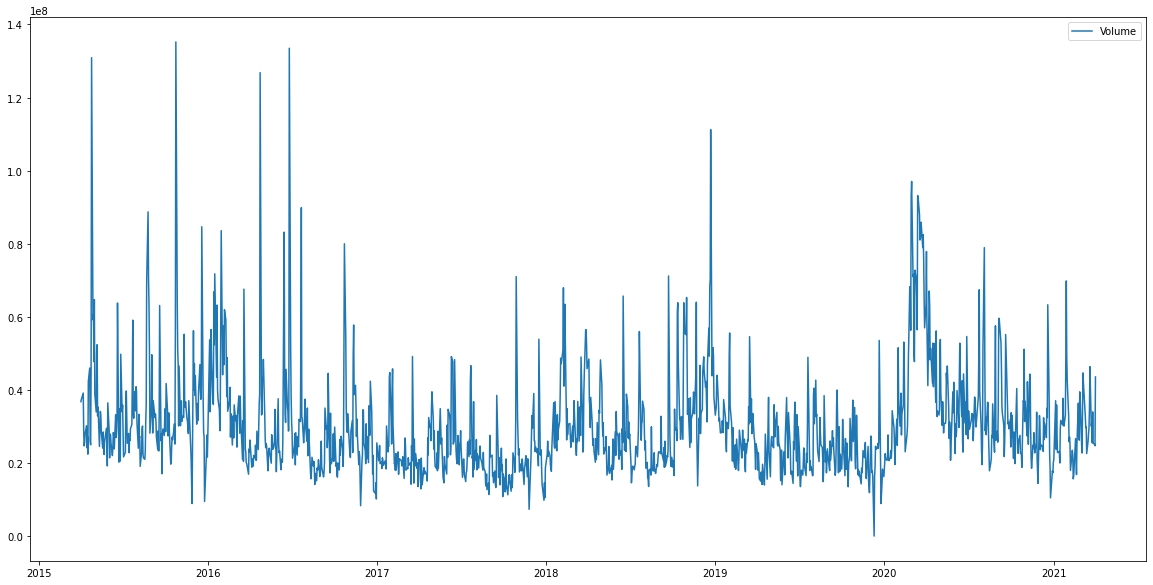

In [44]:
plt.figure(figsize=(20,10))
plt.plot(data.index,data[data.columns[4]],label=data.columns[4])
plt.legend();

In [46]:
def ts(timeseries):
    ma=timeseries.rolling(window=10).mean()
    mstd=timeseries.rolling(window=10).std()
    orig=plt.plot(timeseries,color="orange",label="Original")
    mean=plt.plot(ma,color="b",label="Rolling Mean")
    std=plt.plot(mstd,color="g",label="Rolling std")
    plt.title("Rolling mean & standard deviation")
    plt.legend();

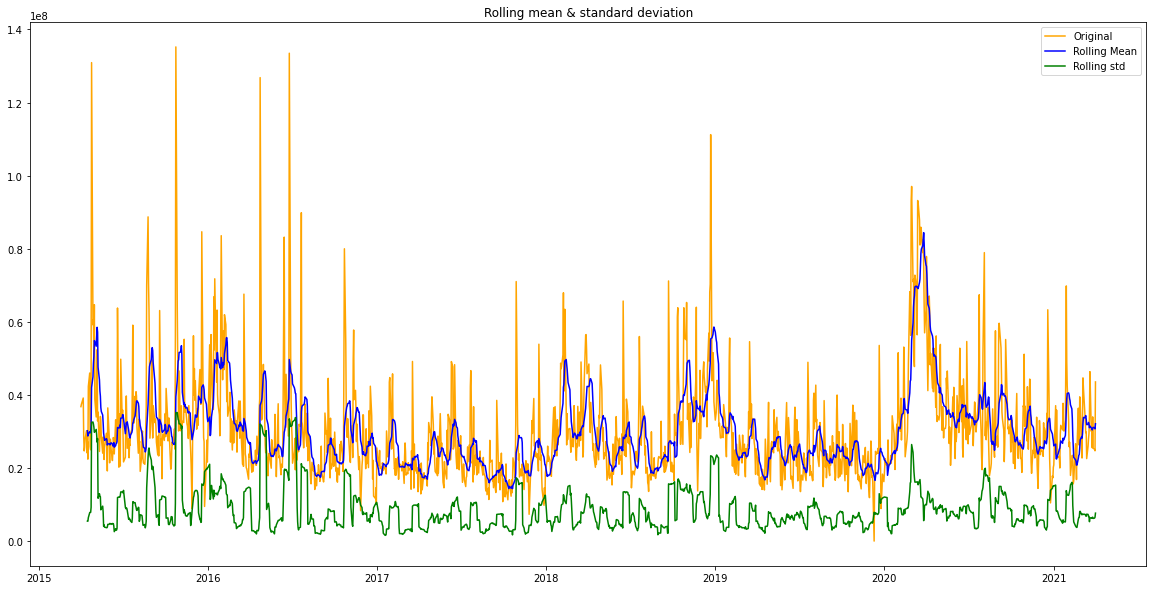

In [48]:
plt.figure(figsize=(20,10))
ts(data["Volume"])

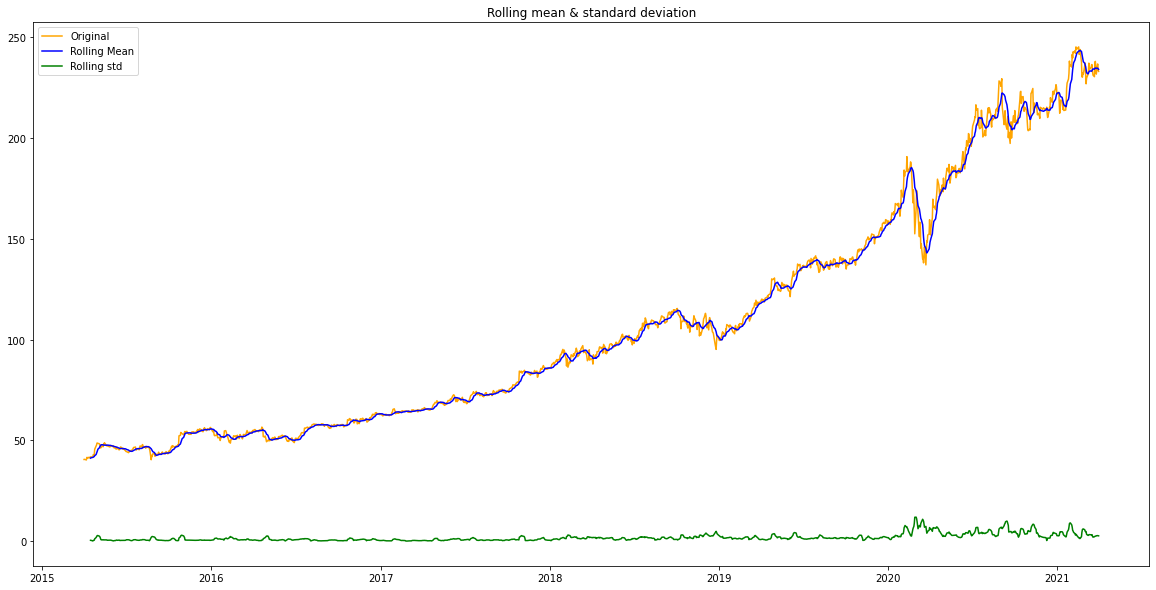

In [49]:
plt.figure(figsize=(20,10))
ts(data["Open"])

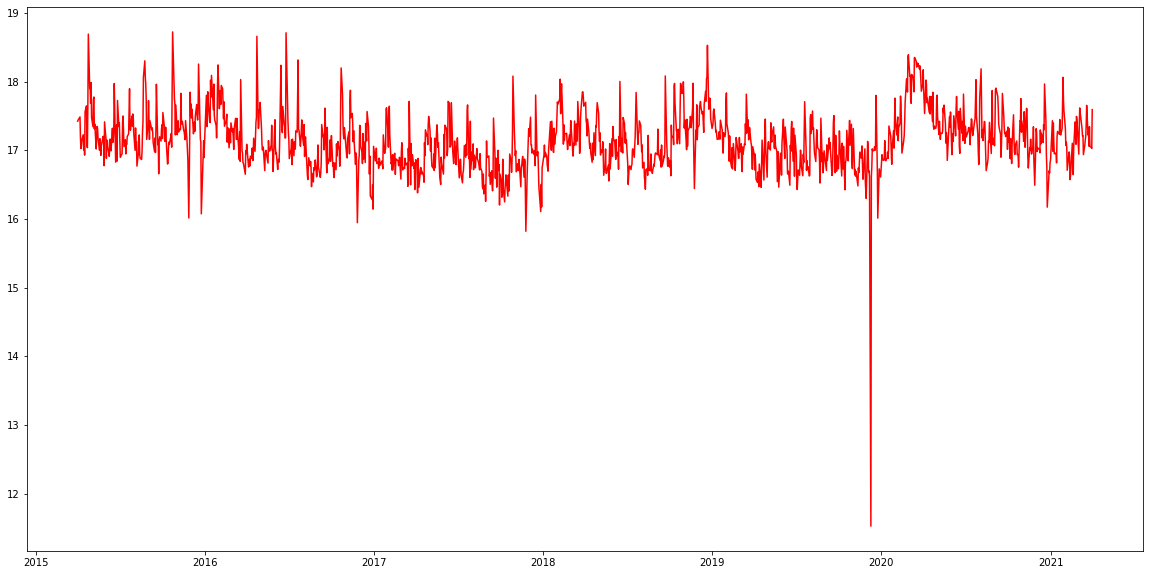

In [51]:
plt.figure(figsize=(20,10))
tslog=np.log(data["Volume"])
plt.plot(tslog,color="red");

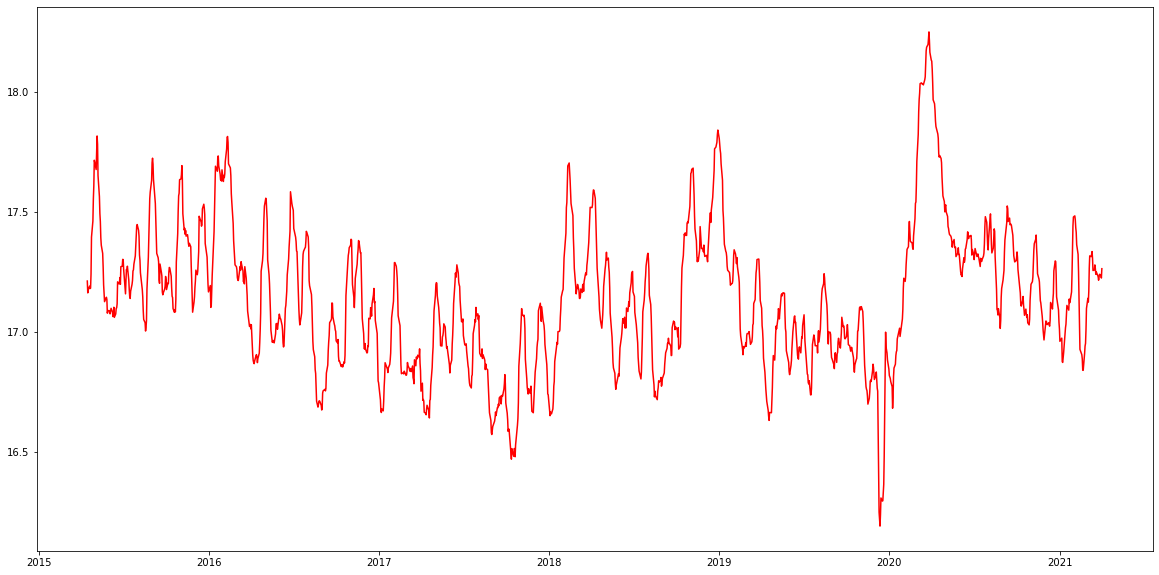

In [52]:
plt.figure(figsize=(20,10))
movaver=tslog.rolling(window=10).mean()
plt.plot(movaver,color="red");